# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [28]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

## Part 1: Gradient Descent

### Set Up

In [2]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [3]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


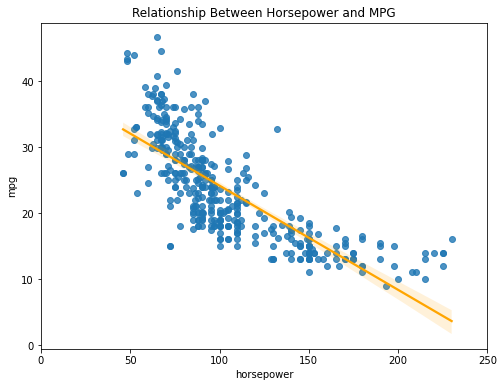

In [4]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

#### Answer: 

- Graph of loss/cost function for linear regression
- Can tell us at what slope is the lowest error
- how large or small the steps need to be to get to the lowest error

### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

- start with bigger steps from left to right, decrease size as it approaches vertex

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

#### Answer: 

- The step is the magnitude of distance that we must change in order to reach the lowest point
- learning rate helps regulate step size along with a partial derivative of the variables to calculate how far we are from the lowest point. It is proportional to the gradient so larger gradients need larger learning rate
- higher learning rate = less steps because they are bigger
- smaller learning rate = more steps because they are smaller

## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

#### Answer: 

- categorical, binary (or multiple classes), nonlinear
- prob of being one class vs another or the class it belongs to
- doesn't deal with linear distances, uses log function to calculate error, not mse
- parametric, uses linear equation so it has betas (aka coeffiients/weights = parameters)
- y = b0 + x1b1 + x2b2 + x3b3...

### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

#### Answer: 

- better interpretation than linear regression depending how it is set up, yes or no, this class or the other
- if we have continuous variables we want to predict, like income, price or time


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [5]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [6]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [11]:
X = mpg_class.drop(columns='target')
y = mpg_class['target']

In [12]:
# Train-test split
# Set test_size=0.33 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.33, random_state=42)

In [14]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

#### Part 1: explore the target column breakdown in train data

In [19]:
y_train.value_counts()

0    195
1     67
Name: target, dtype: int64

In [60]:
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- The most common class (mode) is 0 with 195 values
- class 1 has 67 values
- class imbalance

#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- predict most common, always predict class 0


#### Part 3: How accurate would that baseline be on test data?


In [61]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- accuracy of the baseline would be ~75% - very misleading


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

#### Answer:

- Model, when training, isn't seeing enough data from our minority class to predict it well. Fitting to majority class more
- SMOTE: synthetic minority oversampling technique creates artificial data points based on existing points in minority class. 
- Could also undersample our majority (only if we have a ton of data since we don't want to lose data)
- Instead of oversample or undersample we could use class_weights hyperparameter ('balanced')

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [21]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [26]:
logreg.score(X_test_scaled, y_test)

0.9230769230769231

In [58]:
y_pred = logreg.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [59]:
y_prob = logreg.predict_proba(X_test_scaled)
y_prob

array([[9.97117884e-01, 2.88211554e-03],
       [9.95334221e-01, 4.66577929e-03],
       [9.99860889e-01, 1.39110635e-04],
       [9.97699595e-01, 2.30040460e-03],
       [9.99634518e-01, 3.65481656e-04],
       [9.99043618e-01, 9.56382448e-04],
       [2.79904115e-03, 9.97200959e-01],
       [9.99026897e-01, 9.73103080e-04],
       [9.33336333e-01, 6.66636668e-02],
       [9.99464221e-01, 5.35778541e-04],
       [8.93497133e-03, 9.91065029e-01],
       [9.57162834e-01, 4.28371664e-02],
       [1.54609949e-01, 8.45390051e-01],
       [9.98638756e-01, 1.36124411e-03],
       [9.11830111e-01, 8.81698888e-02],
       [9.99686066e-01, 3.13933548e-04],
       [9.39695786e-01, 6.03042137e-02],
       [9.99734687e-01, 2.65313401e-04],
       [9.99421021e-01, 5.78978925e-04],
       [9.99475392e-01, 5.24607746e-04],
       [8.74667951e-01, 1.25332049e-01],
       [9.99923819e-01, 7.61806157e-05],
       [9.99914240e-01, 8.57600530e-05],
       [1.32938166e-01, 8.67061834e-01],
       [9.993896

In [63]:
y_pred = logreg.predict(X_test_scaled)
metrics = confusion_matrix(y_test, y_pred)
metrics

array([[97,  1],
       [ 9, 23]], dtype=int64)

In [23]:
y_test.value_counts()

0    98
1    32
Name: target, dtype: int64

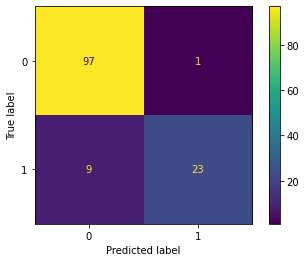

In [22]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test);

$\begin{bmatrix}
TN & FP \\
FN & TP
\end{bmatrix}$`

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [31]:
tn = metrics[0, 0]
fp = metrics[0, 1]
fn = metrics[1, 0]
tp = metrics[1, 1]


In [33]:
# Accuracy: How often did my model correctly identify target
# This should give us the same value as we got from the .score() method.
accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy

0.9230769230769231

Accuracy:
- Pro: Takes into account both false positives and false negatives.
- Con: Can be misleadingly high when there is a significant class imbalance. (A lottery-ticket predictor that *always* predicts a loser will be highly accurate.)

In [64]:
# acc with sklearn
accuracy_score(y_test, y_prob)

0.9230769230769231

In [35]:
# Precision: how often was my model's prediction correct?
precision = tp / (tp + fp)
precision

0.9583333333333334

Precision:
- Pro: Highly sensitive to false positives.
- Con: No sensitivity to false negatives.

In [65]:
precision_score(y_test, y_pred)

0.9583333333333334

In [36]:
# Recall: How many of the actually fraudulent transactions did my model identify?
recall = tp / (tp + fn)
recall

0.71875

Recall:
- Pro: Highly sensitive to false negatives.
- Con: No sensitivity to false positives.

In [66]:
recall_score(y_test, y_pred)

0.71875

In [38]:
# F1-Score:𝐹1score is a combination of precision and recall
f1_score = 2*precision*recall / (precision + recall)
f1_score

0.8214285714285714

F-1 Score:
- Harmonic mean of recall and precision.


The nature of your business problem will help you determine which metric matters.

Sometimes false positives are much worse than false negatives: Arguably, a model that compares a sample of crime-scene DNA with the DNA in a city's database of its citizens presents one such case. Here a false positive would mean falsely identifying someone as having been present at a crime scene, whereas a false negative would mean only that we fail to identify someone who really was present at the crime scene as such.

On the other hand, consider a model that inputs X-ray images and predicts the presence of cancer. Here false negatives are surely worse than false positives: A false positive means only that someone without cancer is misdiagnosed as having it, while a false negative means that someone with cancer is misdiagnosed as *not* having it.

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [70]:
# Calculate roc-auc
y_hat = y_prob[:,1]
roc_auc_score(y_test, y_hat)

0.9811862244897959

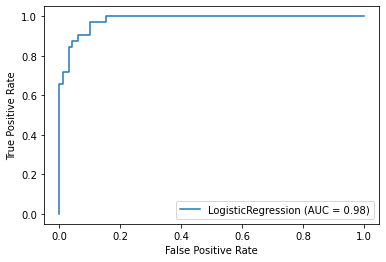

In [71]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [75]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        98
           1       0.96      0.72      0.82        32

    accuracy                           0.92       130
   macro avg       0.94      0.85      0.89       130
weighted avg       0.93      0.92      0.92       130



In [72]:
logreg.score(X_train_scaled, y_train)

0.950381679389313

In [73]:
accuracy_score(y_test, y_pred)

0.9230769230769231

#### Answer:

- based on accuracy and precision I would say its doing well
- roc is also high
- more false negatives than false positives, doing better at predicting the negative class


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [46]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

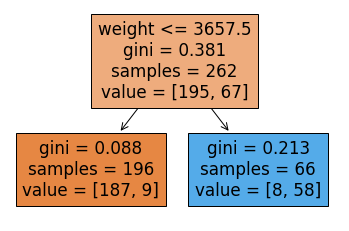

In [47]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

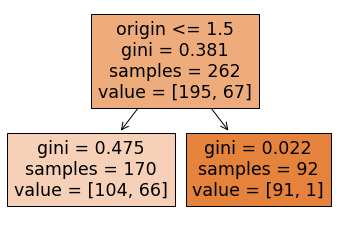

In [48]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

#### Answer:

- version 1 because both leaf are decreasing in gini, the left one increases


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [78]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

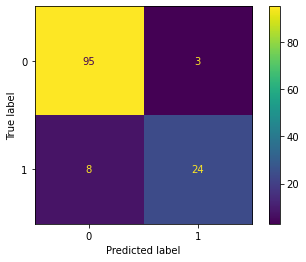

In [79]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test, y_test);

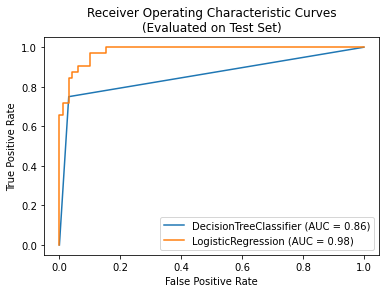

In [80]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

#### Answer:

- The logistic regression has a higer ROC
- the decision tree is prob overfit
